<a href="https://colab.research.google.com/github/sudharsonkumar/Grover-s-algorithm/blob/main/Day4_GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np

In [ ]:
# Example data
y_true = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1])
y_pred = np.array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3 1]
 [2 4]]


In [ ]:
#Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


In [ ]:
#Recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

Recall: 0.6666666666666666


In [ ]:
#Precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

Precision: 0.8


K Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Example dataset
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X, y = iris.data, iris.target
model=LogisticRegression(max_iter=200)

In [ ]:
# K-Fold Cross-Validation
kf=KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-Validation Scores:", kf_scores)
print("Mean Score:", kf_scores.mean())

Cross-Validation Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean Score: 0.9733333333333334


Hands On: Comparing different Classification Models

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Use a subset of the dataset for quicker computation
subset_size = 10000
X = X[:subset_size]
y = y[:subset_size]

In [ ]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Define models
models={
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

In [ ]:
# K-FOld Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
# Cmpare models
for model_name, model in models.items():
    pipeline = Pipeline([('model', model)])
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring = 'accuracy')
    print(f"{model_name} Accuracy: {np.mean(scores)}")

Logistic Regression Accuracy: 0.8877999999999998
Support Vector Machine Accuracy: 0.9138999999999999
Random Forest Accuracy: 0.9503


In [ ]:
# Analyze performance
results = {
    "Logistic Regression ": [],
    "Support Vector Machine": [],
    "Random Forest": []
}

In [ ]:
# K-Fold Cross-Validation
for model_name, model in models.items():
  pipeline = Pipeline([('model', model)])
  scores = cross_val_score(pipeline, X, y, cv=kf, scoring = 'accuracy')
  results[model_name]=scores
  print(f"{model_name} Accuracy: {np.mean(scores)}")
  print(f"{model_name} Scores: {scores}")

Logistic Regression Accuracy: 0.8877999999999998
Logistic Regression Scores: [0.904  0.8815 0.892  0.873  0.8885]
Support Vector Machine Accuracy: 0.9138999999999999
Support Vector Machine Scores: [0.9225 0.9105 0.9215 0.9015 0.9135]
Random Forest Accuracy: 0.9475999999999999
Random Forest Scores: [0.9515 0.953  0.949  0.94   0.9445]


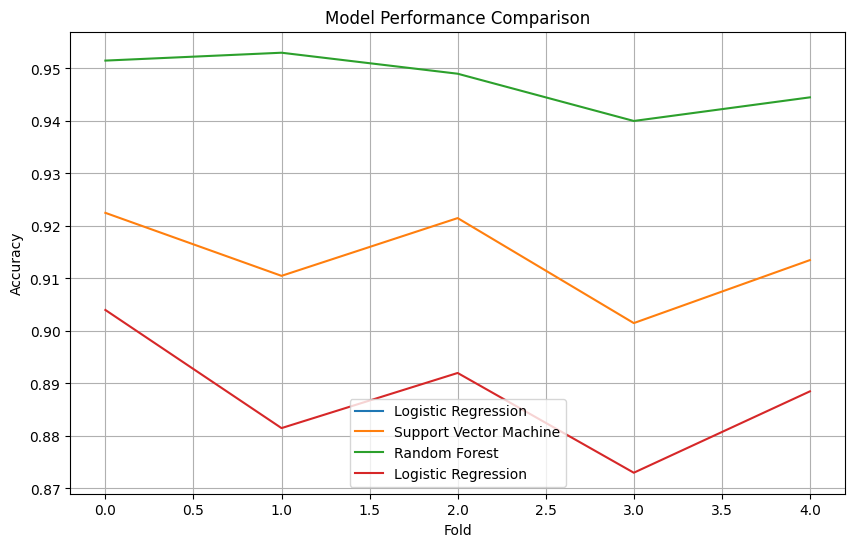

In [ ]:
# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for model_name, scores in results.items():
    plt.plot(scores, label=model_name)

plt.title('Model Performance Comparison')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)